In [123]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Coleta de Dados: 
Selecione uma base de dados adequada para problemas de regressão. A base deve conter pelo menos uma variável dependente e uma ou mais variáveis independentes.

In [124]:
df = pd.read_csv('credit_data.csv')
df.drop(columns=['State', 'City', 'Occupation'], inplace=True)
df

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,LTV Ratio,Employment Profile,Profile Score
0,31,Male,36000,604,487,5,109373,221,No,90.943430,Salaried,77
1,25,Male,50000,447,386,2,150000,89,No,91.135253,Salaried,43
2,62,Other,178000,850,503,10,69099,110,Yes,40.000000,Salaried,90
3,69,Female,46000,668,349,6,150000,148,Yes,87.393365,Self-Employed,86
4,52,Male,132000,601,553,5,150000,157,No,66.158757,Salaried,90
...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,495,565,3,150000,14,No,90.300189,Salaried,71
279852,45,Female,124000,850,476,10,80341,86,Yes,78.960607,Salaried,91
279853,33,Female,71000,582,560,5,39851,101,No,95.000000,Unemployed,57
279854,67,Male,191000,411,481,2,150000,111,No,56.109002,Salaried,69


# Pré-processamento de Dados:

**Elementos Faltantes:** Trate os elementos faltantes na base de dados, se houver.

**Variáveis Categóricas:** Converta variáveis categóricas em numéricas, se necessário.

**Normalização:** Normalize as variáveis, caso seja necessário.

**Separação de Dados:** Divida a base em conjuntos de treino e teste.

In [125]:
print(f"Elementos faltantes:\n{df.isna().sum()}") #Não há elementos faltantes

df = pd.get_dummies(df, columns=['Gender', 'Existing Customer', 'Employment Profile'], prefix=['Gender', 'Existing Customer', 'Employment Profile'])
df.drop(columns=['Gender_Other', 'Existing Customer_No', 'Employment Profile_Unemployed'], inplace=True) #Dummy variable trap

scaler = MinMaxScaler()
df[['Age','Income', 'Credit History Length', 'Number of Existing Loans', 'Loan Amount', 'Loan Tenure', 'LTV Ratio', 'Profile Score']] = scaler.fit_transform(df[['Age','Income', 'Credit History Length', 'Number of Existing Loans', 'Loan Amount', 'Loan Tenure', 'LTV Ratio', 'Profile Score']])

XTrainOne, XTestOne, yTrainOne, yTestOne = train_test_split(df["Income"], df["Credit Score"], test_size = 0.8)
XTrainMultiple, XTestMultiple, yTrainMultiple, yTestMultiple = train_test_split(df[['Age', 'Income', 'Credit History Length', 'Number of Existing Loans', 'Loan Amount', 'Loan Tenure', 'LTV Ratio', 'Profile Score', 'Gender_Female', 'Gender_Male', 'Existing Customer_Yes', 'Employment Profile_Freelancer', 'Employment Profile_Salaried', 'Employment Profile_Self-Employed', 'Employment Profile_Student']], df['Credit Score'], test_size = 0.8)

XTestOne = pd.DataFrame(XTestOne)
XTrainOne = pd.DataFrame(XTrainOne)

Elementos faltantes:
Age                         0
Gender                      0
Income                      0
Credit Score                0
Credit History Length       0
Number of Existing Loans    0
Loan Amount                 0
Loan Tenure                 0
Existing Customer           0
LTV Ratio                   0
Employment Profile          0
Profile Score               0
dtype: int64


# Implementação e Treino:
Implemente e treine três algoritmos de regressão diferentes (por exemplo, Regressão Linear, Regressão Polinomial e Regressão por Floresta Randômica).

In [126]:
#Regressão Linear
regressorLinear = LinearRegression()
XTrain = pd.DataFrame(XTrainOne) #Aqui, o conteúdo de XTrain está em formato unidimensional(série), o método fit do regressor exige que XTrain tenha estrutura bidimensional(dataframe).
regressorLinear.fit(XTrainOne, yTrainOne)

#Regressão Polinomial Múltipla
poly = PolynomialFeatures(degree=2)  
XPoly = poly.fit_transform(XTrainMultiple)
regressorPolinomial = LinearRegression()
regressorPolinomial.fit(XPoly, yTrainMultiple)

#Regressão Linear Múltipla
regressorLinearMultiplo = LinearRegression()
regressorLinearMultiplo.fit(XTrainMultiple, yTrainMultiple)

LinearRegression()

# Avaliação de Modelos
* Use o conjunto de teste para fazer previsões com cada um dos modelos treinados.

In [127]:
#Regressão Linear
yPredLinear = regressorLinear.predict(XTestOne)
dfResultadoLinear = pd.DataFrame(yTestOne)
dfResultadoLinear["Predição"] = yPredLinear
print(dfResultadoLinear)

#Regressão Polinomial Múltipla
XTestPoly = poly.transform(XTestMultiple)
yPredPolinomial = regressorPolinomial.predict(XTestPoly)
dfResultadoPolinomial = pd.DataFrame(yTestMultiple)
dfResultadoPolinomial["Predição"] = yPredPolinomial
print(dfResultadoPolinomial)

#Regressão Linear Múltipla
yPredLinearMultipla = regressorLinearMultiplo.predict(XTestMultiple)
dfResultadoLinearMultipla = pd.DataFrame(yTestMultiple)
dfResultadoLinearMultipla["Predição"] = yPredLinearMultipla
print(dfResultadoLinearMultipla)

        Credit Score    Predição
242119           605  621.951548
221692           530  614.345364
57866            579  547.579976
106514           609  571.243658
140802           724  599.132997
...              ...         ...
125693           390  531.522477
175938           377  549.270239
102979           384  567.018000
194426           750  622.796679
195108           850  641.389572

[223885 rows x 2 columns]
        Credit Score    Predição
32659            680  664.364770
245697           438  432.107476
163392           362  378.253930
131624           700  717.444604
119307           718  718.256738
...              ...         ...
47461            673  665.783716
150531           740  763.660180
122955           747  766.885400
101719           637  654.923089
187753           363  380.866479

[223885 rows x 2 columns]
        Credit Score    Predição
32659            680  661.973668
245697           438  430.120303
163392           362  381.205433
131624           700  

# Avaliação de Modelos
* Calcule métricas de avaliação como RMSE e MAE para cada modelo.

# Comparação de Desempenho:

* Compare as métricas de avaliação entre os três modelos.

* Identifique qual algoritmo teve o melhor desempenho e justifique sua escolha.

In [128]:
#Regressão Linear
mseLinear = mean_squared_error(dfResultadoLinear["Credit Score"], dfResultadoLinear["Predição"])
rmseLinear = np.sqrt(mseLinear)
print("Linear (Pior Desempenho):")
print(f"RMSE: {rmseLinear}")
diferencaLinear = abs(dfResultadoLinear["Predição"] - dfResultadoLinear["Credit Score"])
maeLinear = diferencaLinear.mean()
print(f"MAE: {maeLinear}")
print()

#Regressão Polinomial
msePolinomial = mean_squared_error(dfResultadoPolinomial["Credit Score"], dfResultadoPolinomial["Predição"])
rmsePolinomial = np.sqrt(msePolinomial)
print("Polinomial (Melhor Desempenho):")
print(f"RMSE: {rmsePolinomial}")
diferencaPolinomial = abs(dfResultadoPolinomial["Predição"] - dfResultadoPolinomial["Credit Score"])
maePolinomial = diferencaPolinomial.mean()
print(f"MAE: {maePolinomial}")
print()

#Regressão Linear Múltipla
mseLinearMultipla = mean_squared_error(dfResultadoLinearMultipla["Credit Score"], dfResultadoLinearMultipla["Predição"])
rmseLinearMultipla = np.sqrt(mseLinearMultipla)
print("Linear Múltipla:")
print(f"RMSE: {rmseLinearMultipla}")
diferencaLinearMultipla = abs(dfResultadoLinearMultipla["Predição"] - dfResultadoLinearMultipla["Credit Score"])
maeLinearMultipla = diferencaLinearMultipla.mean()
print(f"MAE: {maeLinearMultipla}")

Linear (Pior Desempenho):
RMSE: 159.0743522179587
MAE: 137.55046245410534

Polinomial (Melhor Desempenho):
RMSE: 14.88255907320169
MAE: 12.319192216944204

Linear Múltipla:
RMSE: 16.095303683085096
MAE: 13.735401321832613


# Visualização Linear

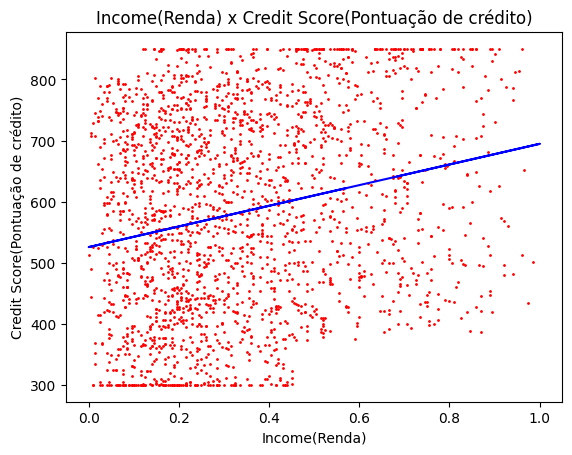

In [129]:
plt.scatter(XTestOne["Income"][::100], dfResultadoLinear["Credit Score"][::100], color = 'red', s=1) #[inicio:fim:step] 1% das amostras
plt.plot(XTestOne["Income"], dfResultadoLinear["Predição"], color='blue')
plt.title("Income(Renda) x Credit Score(Pontuação de crédito)")
plt.xlabel("Income(Renda)")
plt.ylabel("Credit Score(Pontuação de crédito)")
plt.show()

# Visualização Polinomial

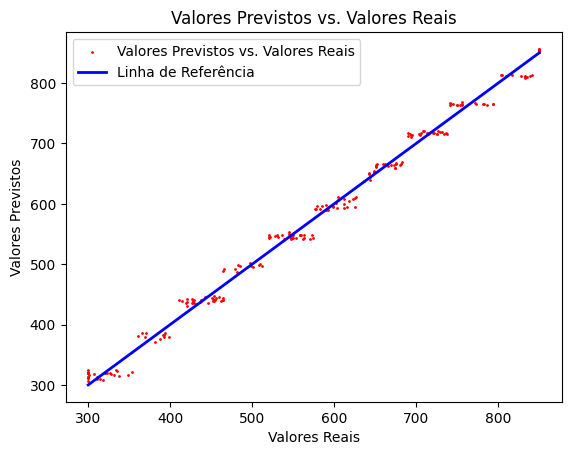

In [130]:
plt.close()
plt.scatter(dfResultadoPolinomial["Credit Score"][::1000], dfResultadoPolinomial["Predição"][::1000], c='red', label='Valores Previstos vs. Valores Reais', s=1)
plt.plot([min(dfResultadoPolinomial["Credit Score"]), max(dfResultadoPolinomial["Credit Score"])], [min(dfResultadoPolinomial["Credit Score"]), max(dfResultadoPolinomial["Credit Score"])], color='blue', linewidth=2, label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.title('Valores Previstos vs. Valores Reais')
plt.show()

# Visualização Linear Múltipla

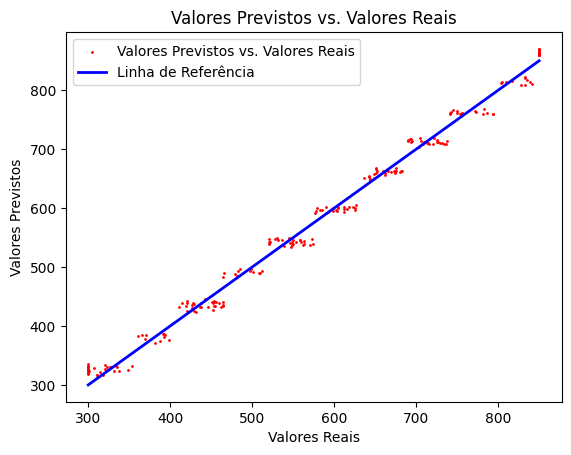

In [131]:
plt.close()
plt.scatter(dfResultadoLinearMultipla["Credit Score"][::1000], dfResultadoLinearMultipla["Predição"][::1000], c='red', label='Valores Previstos vs. Valores Reais', s=1)
plt.plot([min(dfResultadoLinearMultipla["Credit Score"]), max(dfResultadoLinearMultipla["Credit Score"])], [min(dfResultadoLinearMultipla["Credit Score"]), max(dfResultadoLinearMultipla["Credit Score"])], color='blue', linewidth=2, label='Linha de Referência')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.legend()
plt.title('Valores Previstos vs. Valores Reais')
plt.show()

# Relatório

## Coleta de dados

* A base escolhida contém dados sobre análise de crédito de pessoas indianas. (https://www.kaggle.com/datasets/yashkmd/credit-profile-two-wheeler-loan-dataset)
* Busca-se prever o score(variável dependente)
* Para a regressão linear, foi escolhida o dado renda anual(income) como variável independente.
* Para as regressões múltiplas, foram escolhidas todas as outras colunas, exceto "State", "City" e "Occupation", variáveis categóricas que tem muitos valores únicos, então foram tiradas pois com o one-hot enconding delas, a base teria um número excessivo de colunas.

## Pré-processamento de Dados

* Não haviam elementos faltantes.
* Foram separados dois conjuntos diferentes de treino e teste, um com apenas uma variável independente, para a regressão linear, e outro com as demais variáveis, ambos com proporção 80/20. 
* Para o conjunto da regressão linear, não necessário normalizar os dados, por haver apenas uma variável independente.
* Para o conjunto das regressões múltiplas, variáveis categóricas foram tranformadas em dummy variables, com o one-hot encoding, e as demais colunas foram devidamente normalizado com o min-max scaler.

## Avaliação de Modelo
* Os dados da regressão linear apresentaram muito discrepância, de forma geral, com RMSE de 159.102 e MAE de 137.55, um erro bem significativo, e o pior resultado entre as regressões testadas.
* Os dados da regressão polinomial foram muito mais precisos, com RMSE de 14.8 e MAE de 12.3, um erro bem menor, e o melhor resultado entre as regressões testadas.
* Os dados da regressão linear múltipla também foram muito precisos, porém um pouco menos que o de regressão polinomial. RMSE de e 16.09 MAE de 13.7, erros bem pequenos. Teve uma perfomance bem melhor que a regressão linear, porém um pouquinho inferior à regressão polinomial.

